In [1]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import rtmtools.lblrtm.aerutils as aerutils
import rtmtools.lblrtm.aeranalyse as aeranalyse

import rtmtools.clirad.sw.wrangle as cliradwrangle

import rtmtools.rrtmg.sw.wrangle as rrtmgwrangle

import climatools.offline_scripts.intermodel as scripts_intermodel



importlib.reload(aerutils)

importlib.reload(aeranalyse)

importlib.reload(cliradwrangle)

importlib.reload(rrtmgwrangle)

importlib.reload(scripts_intermodel)


<module 'climatools.offline_scripts.intermodel' from '/nuwa_cluster/home/jackyu/climatools/climatools/offline_scripts/intermodel.py'>

In [2]:
name_molecule = 'CO2' #r'$H_{2}O$'

In [3]:
# Load CRD results

# CRD H2008
#pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
#                           'radiation/crd/SW/examples',
#                           'mls75_H2O_new/OUTPUT_CRD.dat')
#pnl_crd = aerutils\
#.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
#                              signed_fluxes=True)

path_crd = os.path.join('/nuwa_cluster/home/jackyu',
                        'radiation/crd/SW/examples',
                        'mls75_{name_molecule}'\
                        .format(name_molecule=name_molecule),
                        'OUTPUT_CRD.dat')
pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom=path_crd, 
                                                signed_fluxes=True)

In [4]:
# CRD H2012
#pathout_crd = os.path.join('/nuwa_cluster/home/jackyu',
#                           'radiation/crd/SW/examples',
#                           'mls75_{name_molecule}_solzen_60_H2012'\
#                           .format(name_molecule=name_molecule),
#                           'OUTPUT_CRD.dat')
#pnl_crd_H2012 = aerutils\
#.OUTPUT_RADSUM_to_pandasPanel(readfrom=pathout_crd, 
#                              signed_fluxes=True)

In [5]:
# Load CLIRAD results
pathout_clirad = os.path.join('/nuwa_cluster/home/jackyu',
                              'radiation/clirad/SW/examples',
                              'mls75_{name_molecule}'\
                              .format(name_molecule=name_molecule),
                              'OUTPUT_CLIRAD.dat')
pnl_clirad = cliradwrangle\
.OUTPUT_CLIRAD_to_PandasPanel(readfrom=pathout_clirad, 
                              signed_fluxes=True)

In [7]:
# load CLIRAD results (Yi Hsuan's version)
#pathout_clirad1 = '/nuwa_cluster/home/jackyu/radiation/clirad/SW/examples/mls75_CO2_yihsuan/ss-output-sw-goddard.dat'
#df_clirad1 = cliradwrangle.output_txtfile_to_DataFrame(readfrom = pathout_clirad1)

#Pres_clirad1 = df_clirad1.values[:, 0]
#fd_clirad1 = df_clirad1.values[:, 1]

#pres_clirad1 = .5 * (df_clirad1.values[: -1, 0] + df_clirad1.values[1:, 0])
#hr_clirad1  = df_clirad1.values[1:, -1]



In [6]:
# Load AER RRTMG's results
pathout_rrtmg = os.path.join('/nuwa_cluster/home/jackyu',
                             'radiation/rrtmg/SW/examples',
                             'mls_71lvls_{name_molecule}'\
                             .format(name_molecule=name_molecule),
                             'OUTPUT_RRTM')
pnl_rrtmg = rrtmgwrangle\
.OUTPUT_RRTM_to_pandasPanel(readfrom=pathout_rrtmg, 
                            signed_fluxes=True)

# 'Total' heating rates

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  629.328076  629.328076      5.475085
30   299.800000        0  625.732461  625.732461      0.058419
0   1013.000000        0  622.168123  622.168123      0.032883

RRTMG
      pressure  flux_up  flux_down  net_flux  heating_rate
70     0.00242        0   592.7475  592.7475       0.00000
30   299.70000        0   587.5414  587.5414       0.08286
0   1013.00000        0   583.7914  583.7914       0.03178

CLIRAD
       pressure   flux_up   flux_down    net_flux  heating_rate
70     0.002417 -0.000253  684.107094  684.106841     23.146717
30   299.800000 -0.000109  680.734798  680.734689     -0.028404
0   1013.000000  0.000000  678.911311  678.911311      0.027515

CRD - RRTMG
    pressure  flux_up  flux_down   net_flux  heating_rate
70 -0.000003        0  36.580576  36.580576      5.475085
30  0.100000        0  38.191061  38.191061     -0.024441
0   0.000000        0  38.376723  38.376723      0

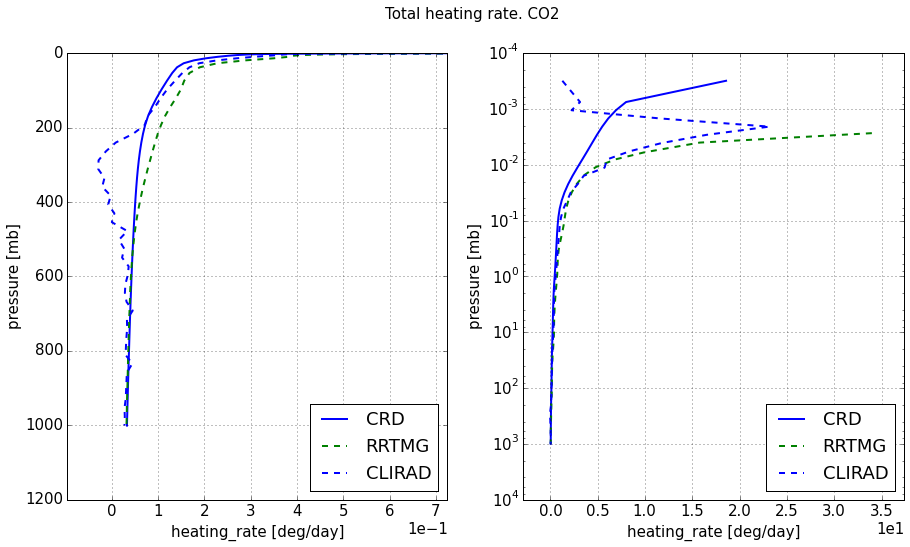

In [8]:
scripts_intermodel.sw_results_all_wavenumbers(
    infos_wavenumber = [('CRD', 'b', '-', pnl_crd),
                        ('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_spectralband = [('CLIRAD', 'b', '--', pnl_clirad)],
    name_molecule=name_molecule)

In [9]:
html_download = ('<a href="./shortwave_mls_{name_molecule}_total.xlsx"'
                 'download>shortwave_mls_{name_molecule}_total.xlsx</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In selected spectral bands

In [ ]:
# By arbitrary bands

def define_spectral_bands():
    return [(1000, 4400),
           (4400, 8200),
           (8200, 14280),
           (14280, 25000),
           (1000, 25000)]


def fluxtableNhrplot_by_bands(bands, *infos_lbl):
    global name_molecule, xlim_linear
    
    atm_levels = [70, 30, 0]
    
    names, colours, linestyles, pnls_lbl = map(list, zip(*infos_lbl))
          
    pnls = [aeranalyse.lines2bands(pnl_lbl, wbands = bands)\
            for pnl_lbl in pnls_lbl]
    
    
    for item in bands:
        print('---------------------------------------------------------------------------')
        print() 
        dfs = [pnl[item].loc[atm_levels, :] for pnl in pnls]
        
        viz.tabulate_difference(dfs = dfs, 
                                names = names,
                                title = 'Wavenumber band: {} ~ {} cm-1'.format(*item))      
        
        dfs = [pnl[item] for pnl in pnls]
        
        max_cr = max([df['heating_rate'].max() for df in dfs])
        
        viz.plot_pres_vs_hrcr(dfs = dfs,
                              names = names,
                              linestyles = linestyles, 
                              colours = colours,
                              title = 'Heating rate {} {} ~ {} cm-1'.format(name_molecule, *item),
                              cooling_rate = False,
                              xlim_linear = None,
                              xlim_log = None)
    
        display.display(plt.gcf()); plt.close()

In [110]:
print('Flux tables and heating rates in various spectral bands')
print()
print()

#fluxtableNhrplot_by_bands(define_spectral_bands(), \
#                         ('CRD', 'b', '-', pnl_crd),
#                         ('CRD H2012', 'y', '--', pnl_crd_H2012))

Flux tables and heating rates in various spectral bands




# In RRMTG's wavenumber bands

Flux tables and heating rates in RRTMG spectral bands


RRTMG-SW spectral band. Band 1. 2600.0 ~ 3250.0 cm-1.

RRTMG
      pressure  flux_up  flux_down  net_flux  heating_rate
70     0.00242       -0   6.046375  6.046375             0
30   299.70000       -0   6.046375  6.046375             0
0   1013.00000       -0   6.046375  6.046375             0

CRD
       pressure  flux_up  flux_down  net_flux  heating_rate
70     0.002417        0   6.046375  6.046375      0.000102
30   299.800000        0   6.045059  6.045059      0.000038
0   1013.000000        0   6.041777  6.041777      0.000040

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000     -0.000102
30 -0.100000       -0   0.001317  0.001317     -0.000038
0   0.000000       -0   0.004598  0.004598     -0.000040



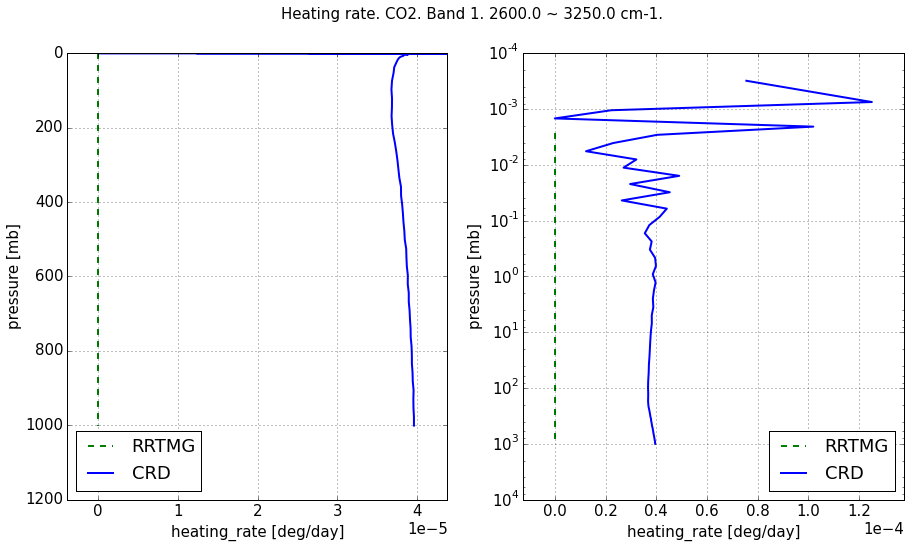


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 2. 3250.0 ~ 4000.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  10.191556  10.191556       0.00000
30   299.70000       -0   7.539500   7.539500       0.04016
0   1013.00000       -0   6.737988   6.737988       0.00385

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  10.191556  10.191556      3.509060
30   299.800000        0   8.296987   8.296987      0.021138
0   1013.000000        0   7.517620   7.517620      0.004219

RRTMG - CRD
    pressure  flux_up     flux_down      net_flux  heating_rate
70  0.000003       -0 -1.776357e-15 -1.776357e-15     -3.509060
30 -0.100000       -0 -7.574868e-01 -7.574868e-01      0.019022
0   0.000000       -0 -7.796326e-01 -7.796326e-01     -0.000369



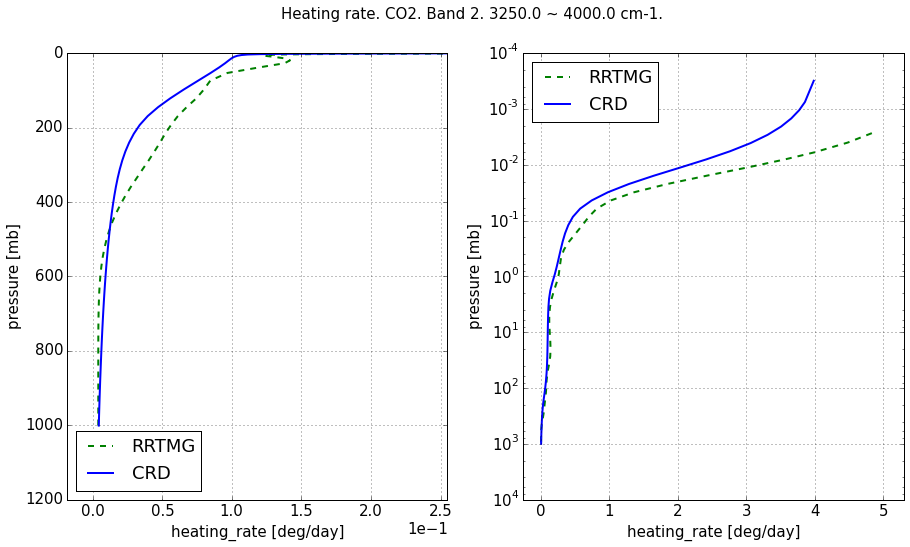


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 3. 4000.0 ~ 4650.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  11.837001  11.837001             0
30   299.70000       -0  11.837001  11.837001             0
0   1013.00000       -0  11.837001  11.837001             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  11.837001  11.837001      0.000045
30   299.800000        0  11.835666  11.835666      0.000038
0   1013.000000        0  11.832273  11.832273      0.000042

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000     -0.000045
30 -0.100000       -0   0.001336  0.001336     -0.000038
0   0.000000       -0   0.004728  0.004728     -0.000042



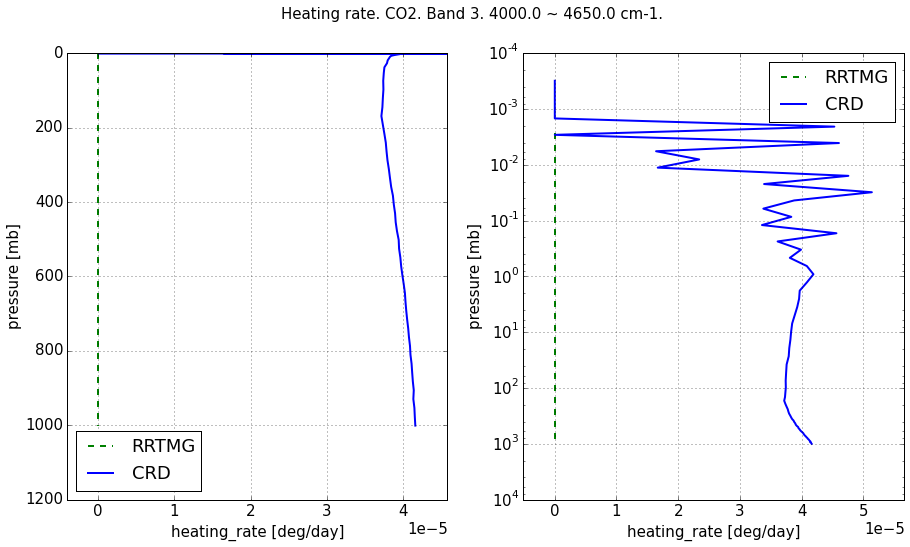


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 4. 4650.0 ~ 5150.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  11.175451  11.175451       0.00000
30   299.70000       -0  10.051607  10.051607       0.02344
0   1013.00000       -0   8.086949   8.086949       0.01979

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  11.175451  11.175451      0.169568
30   299.800000        0  10.200051  10.200051      0.026275
0   1013.000000        0   8.273814   8.273814      0.018939

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000     -0.169568
30 -0.100000       -0  -0.148444 -0.148444     -0.002835
0   0.000000       -0  -0.186865 -0.186865      0.000851



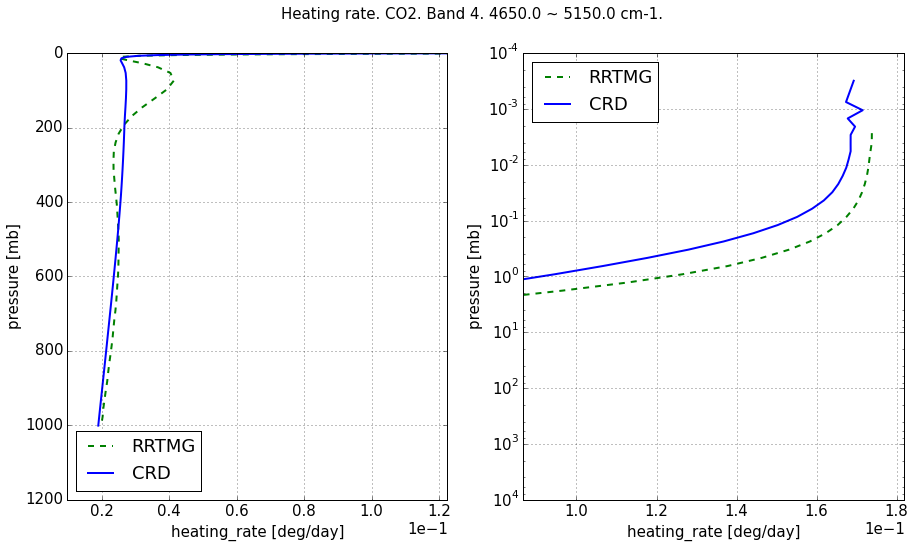


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 5. 5150.0 ~ 6150.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  28.035879  28.035879             0
30   299.70000       -0  28.035879  28.035879             0
0   1013.00000       -0  28.035879  28.035879             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  28.035879  28.035879      0.000544
30   299.800000        0  28.021136  28.021136      0.000422
0   1013.000000        0  27.980950  27.980950      0.000518

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000     -0.000544
30 -0.100000       -0   0.014744  0.014744     -0.000422
0   0.000000       -0   0.054930  0.054930     -0.000518



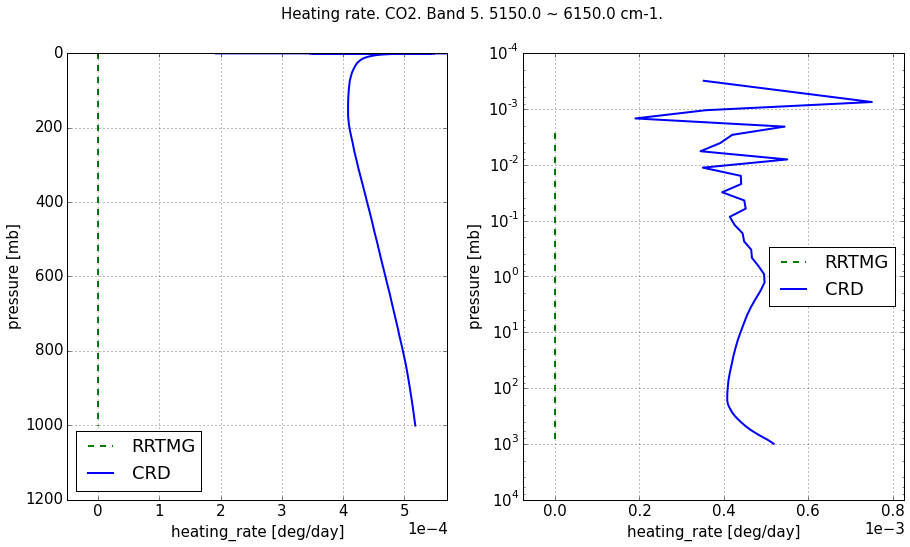


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 6. 6150.0 ~ 7700.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  51.855627  51.855627       0.00000
30   299.70000       -0  51.535116  51.535116       0.00743
0   1013.00000       -0  50.998481  50.998481       0.00584

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  51.855627  51.855627      0.012054
30   299.800000        0  51.619411  51.619411      0.006405
0   1013.000000        0  51.081180  51.081180      0.006262

RRTMG - CRD
    pressure  flux_up     flux_down      net_flux  heating_rate
70  0.000003       -0  7.105427e-15  7.105427e-15     -0.012054
30 -0.100000       -0 -8.429464e-02 -8.429464e-02      0.001025
0   0.000000       -0 -8.269837e-02 -8.269837e-02     -0.000422



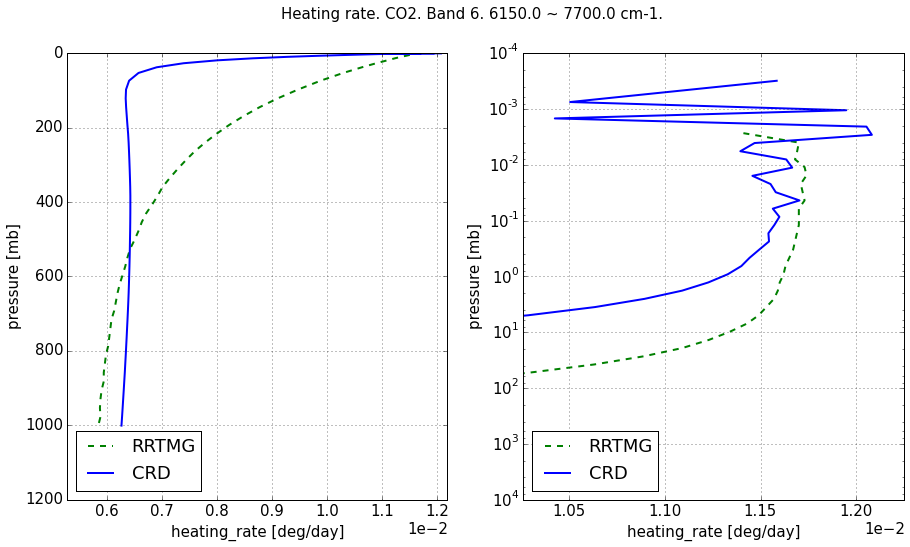


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 7. 7700.0 ~ 8050.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  12.480128  12.480128             0
30   299.70000       -0  12.480128  12.480128             0
0   1013.00000       -0  12.480128  12.480128             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  12.480128  12.480128      0.000091
30   299.800000        0  12.479561  12.479561      0.000016
0   1013.000000        0  12.478275  12.478275      0.000015

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000     -0.000091
30 -0.100000       -0   0.000566  0.000566     -0.000016
0   0.000000       -0   0.001852  0.001852     -0.000015



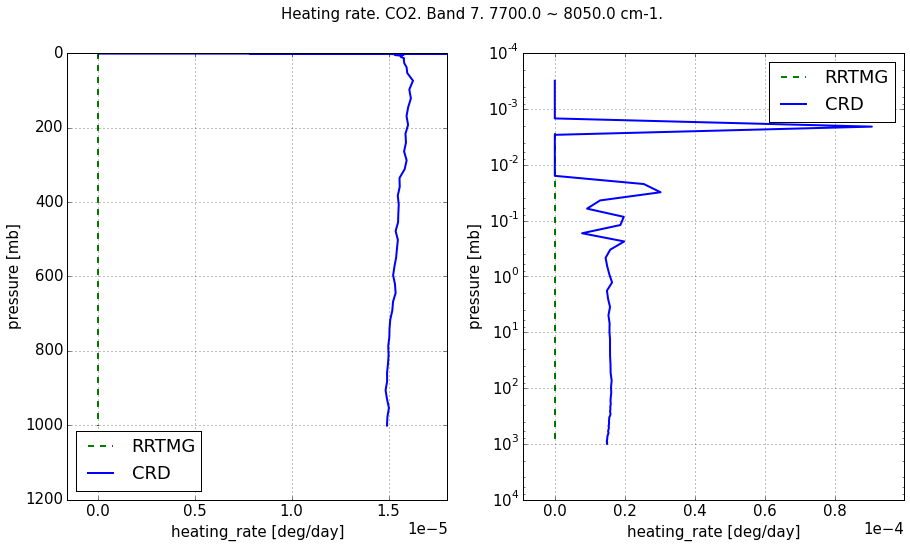


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 8. 8050.0 ~ 12850.0 cm-1.

RRTMG
      pressure  flux_up   flux_down    net_flux  heating_rate
70     0.00242       -0  175.812142  175.812142             0
30   299.70000       -0  175.812142  175.812142             0
0   1013.00000       -0  175.812142  175.812142             0

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  175.812142  175.812142      0.000363
30   299.800000        0  175.794009  175.794009      0.000505
0   1013.000000        0  175.751647  175.751647      0.000499

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000     -0.000363
30 -0.100000       -0   0.018133  0.018133     -0.000505
0   0.000000       -0   0.060495  0.060495     -0.000499



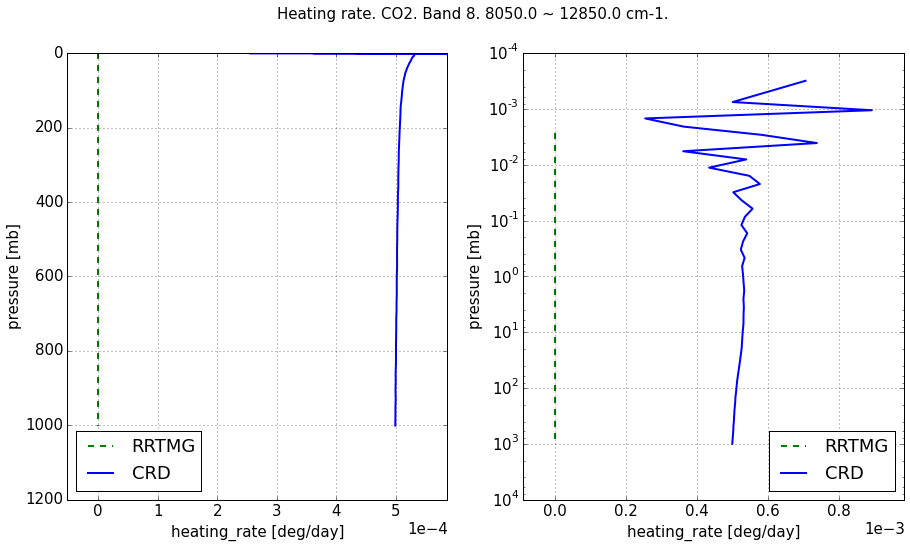


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 9. 12850.0 ~ 16000.0 cm-1.

RRTMG
      pressure  flux_up   flux_down    net_flux  heating_rate
70     0.00242       -0  108.653756  108.653756             0
30   299.70000       -0  108.653756  108.653756             0
0   1013.00000       -0  108.653756  108.653756             0

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  108.653756  108.653756             0
30   299.800000        0  108.653756  108.653756             0
0   1013.000000        0  108.653756  108.653756             0

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0          0         0             0
30 -0.100000       -0          0         0             0
0   0.000000       -0          0         0             0



/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


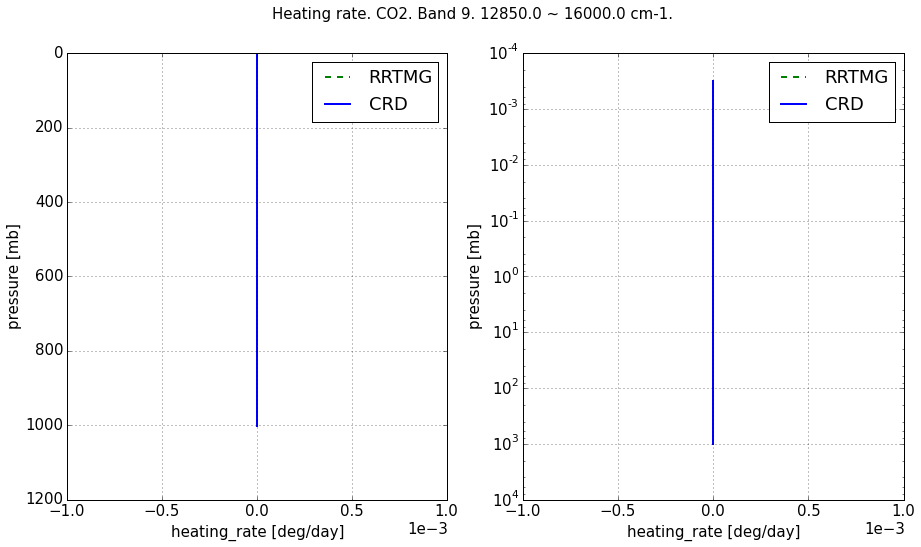


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 10. 16000.0 ~ 22650.0 cm-1.

RRTMG
      pressure  flux_up   flux_down    net_flux  heating_rate
70     0.00242       -0  171.966629  171.966629             0
30   299.70000       -0  171.966629  171.966629             0
0   1013.00000       -0  171.966629  171.966629             0

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  171.966629  171.966629             0
30   299.800000        0  171.966629  171.966629             0
0   1013.000000        0  171.966629  171.966629             0

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0          0         0             0
30 -0.100000       -0          0         0             0
0   0.000000       -0          0         0             0



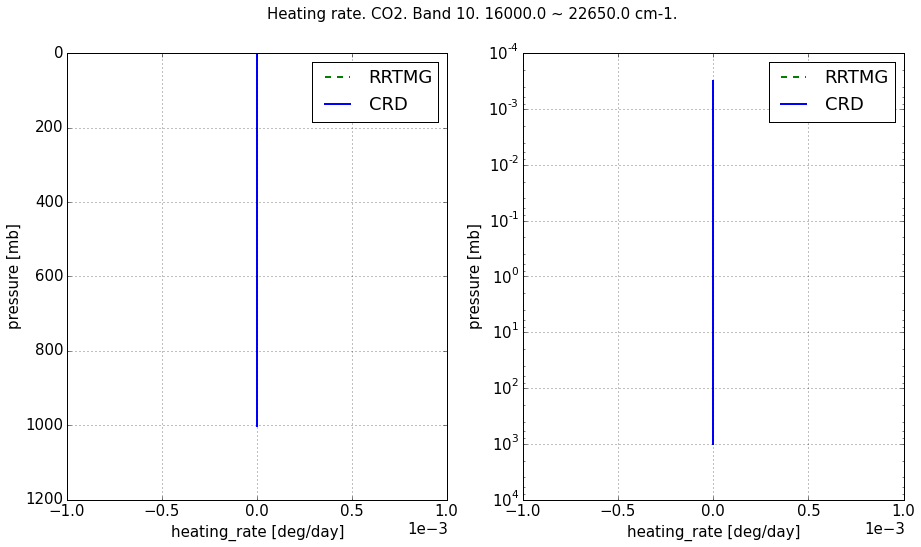


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 11. 22650.0 ~ 29000.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  63.770652  63.770652             0
30   299.70000       -0  63.770652  63.770652             0
0   1013.00000       -0  63.770652  63.770652             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  63.770652  63.770652             0
30   299.800000        0  63.770652  63.770652             0
0   1013.000000        0  63.770652  63.770652             0

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0          0         0             0
30 -0.100000       -0          0         0             0
0   0.000000       -0          0         0             0



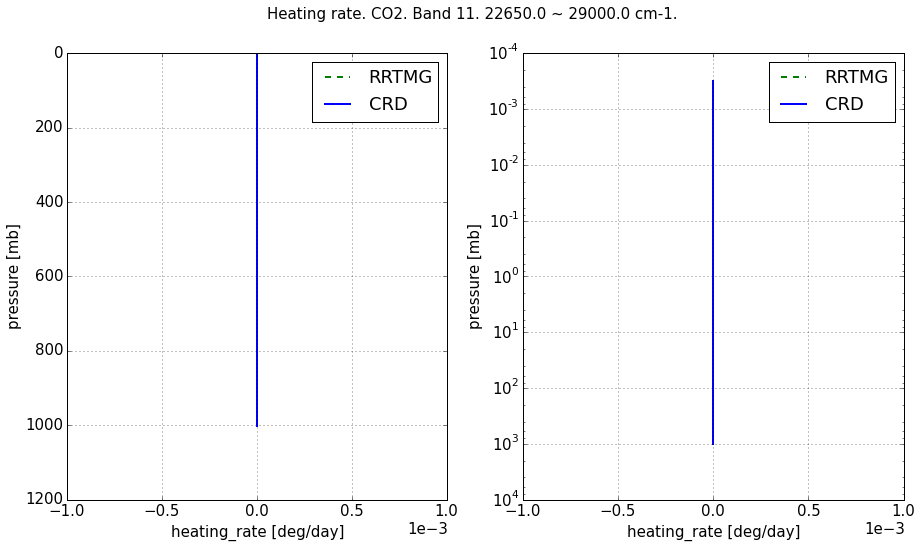


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 12. 29000.0 ~ 38000.0 cm-1.

RRTMG
      pressure  flux_up  flux_down   net_flux  heating_rate
70     0.00242       -0  23.027947  23.027947             0
30   299.70000       -0  23.027947  23.027947             0
0   1013.00000       -0  23.027947  23.027947             0

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  23.027947  23.027947             0
30   299.800000        0  23.027947  23.027947             0
0   1013.000000        0  23.027947  23.027947             0

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0          0         0             0
30 -0.100000       -0          0         0             0
0   0.000000       -0          0         0             0



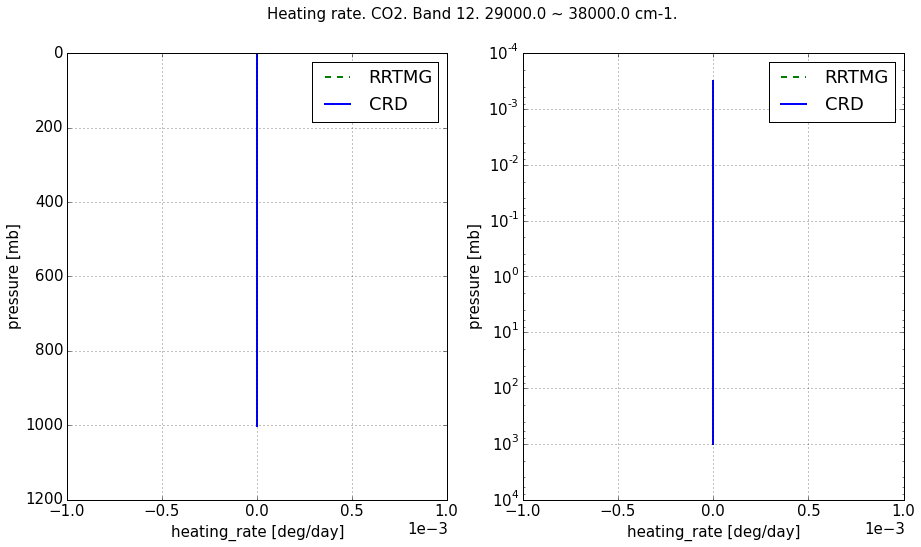


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 13. 38000.0 ~ 50000.0 cm-1.

RRTMG
      pressure  flux_up  flux_down  net_flux  heating_rate
70     0.00242       -0   1.544536  1.544536             0
30   299.70000       -0   1.544536  1.544536             0
0   1013.00000       -0   1.544536  1.544536             0

CRD
       pressure  flux_up  flux_down  net_flux  heating_rate
70     0.002417        0   1.544536  1.544536             0
30   299.800000        0   1.544536  1.544536             0
0   1013.000000        0   1.544536  1.544536             0

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0          0         0             0
30 -0.100000       -0          0         0             0
0   0.000000       -0          0         0             0



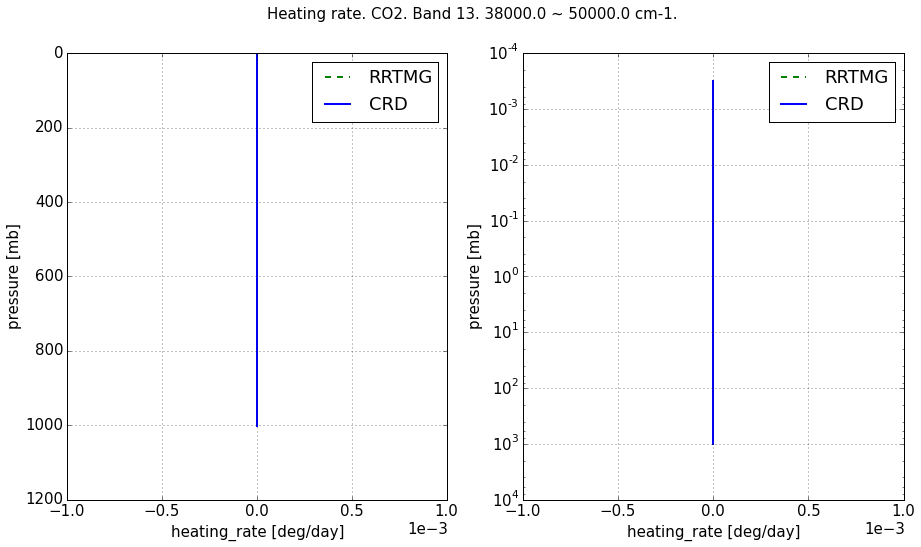


------------------------------------------------------------------------

RRTMG-SW spectral band. Band 14. 820.0 ~ 2600.0 cm-1.

RRTMG
      pressure  flux_up  flux_down  net_flux  heating_rate
70     0.00242       -0   6.189164  6.189164       0.00000
30   299.70000       -0   5.122600  5.122600       0.01183
0   1013.00000       -0   4.695052  4.695052       0.00230

CRD
       pressure  flux_up  flux_down  net_flux  heating_rate
70     0.002417        0   6.189164  6.189164      1.783259
30   299.800000        0   5.735829  5.735829      0.003583
0   1013.000000        0   5.505834  5.505834      0.002350

RRTMG - CRD
    pressure  flux_up  flux_down  net_flux  heating_rate
70  0.000003       -0   0.000000  0.000000     -1.783259
30 -0.100000       -0  -0.613230 -0.613230      0.008247
0   0.000000       -0  -0.810782 -0.810782     -0.000050



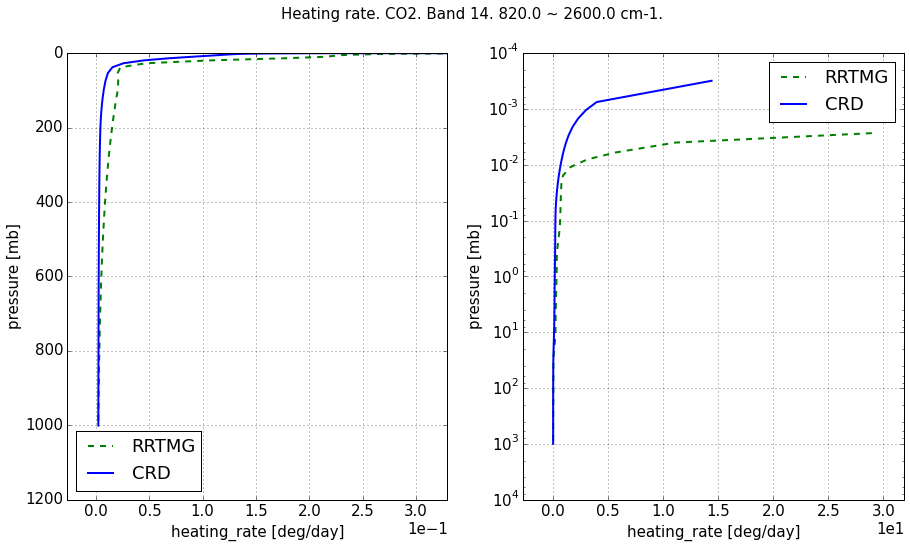


------------------------------------------------------------------------



In [11]:
print('Flux tables and heating rates in RRTMG spectral bands')
print()
print()

scripts_intermodel.sw_results_by_rrtmg_bands(
    infos_rrtmg=[('RRTMG', 'g', '--', pnl_rrtmg)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd)],
    name_molecule=name_molecule) 

In [12]:
html_download = ('<a href='
                 '"./shortwave_mls_{name_molecule}_by_rrtmg_bands.xlsx"'
                 'download>'
                 'shortwave_mls_{name_molecule}_by_rrtmg_bands.xlsx'
                 '</a>')

display.HTML(html_download.format(name_molecule=name_molecule))

# In CLIRAD's wavenumber bands

Flux tables and heating rates in CLIRAD spectral bands


CLIRAD-SW spectral. Band 1. 35088 ~ 44444 cm-1

CLIRAD
       pressure       flux_up  flux_down  net_flux  heating_rate
70     0.002417 -4.766759e-12   3.512217  3.512217     22.181900
30   299.800000 -2.042879e-12   0.246429  0.246429     -0.028432
0   1013.000000 -0.000000e+00  -1.518599 -1.518599      0.027487

CRD
       pressure  flux_up  flux_down  net_flux  heating_rate
70     0.002417        0   3.514606  3.514606             0
30   299.800000        0   3.514606  3.514606             0
0   1013.000000        0   3.514606  3.514606             0

CLIRAD - CRD
    pressure       flux_up  flux_down  net_flux  heating_rate
70         0 -4.766759e-12  -0.002389 -0.002389     22.181900
30         0 -2.042879e-12  -3.268177 -3.268177     -0.028432
0          0 -0.000000e+00  -5.033205 -5.033205      0.027487



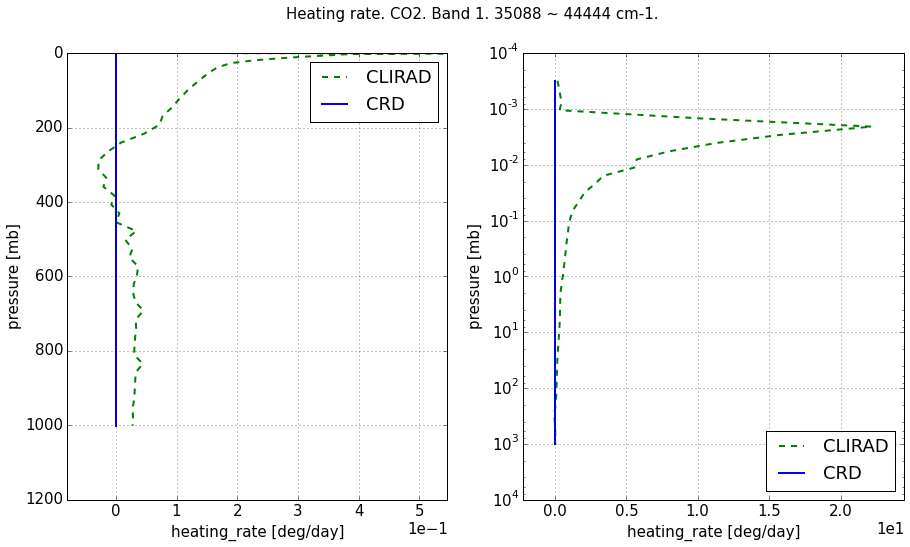


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 2. 33333 ~ 35088 44444 ~ 57142 cm-1

CLIRAD
       pressure       flux_up  flux_down  net_flux  heating_rate
70     0.002417 -7.473721e-13   3.854356  3.854356  2.327879e-02
30   299.800000 -3.203125e-13   3.854270  3.854270  6.795004e-07
0   1013.000000 -0.000000e+00   3.854206  3.854206  6.794891e-07

CRD
       pressure  flux_up  flux_down  net_flux  heating_rate
70     0.002417        0   3.854367  3.854367             0
30   299.800000        0   3.854367  3.854367             0
0   1013.000000        0   3.854367  3.854367             0

CLIRAD - CRD
    pressure       flux_up  flux_down  net_flux  heating_rate
70         0 -7.473721e-13  -0.000011 -0.000011  2.327879e-02
30         0 -3.203125e-13  -0.000097 -0.000097  6.795004e-07
0          0 -0.000000e+00  -0.000161 -0.000161  6.794891e-07



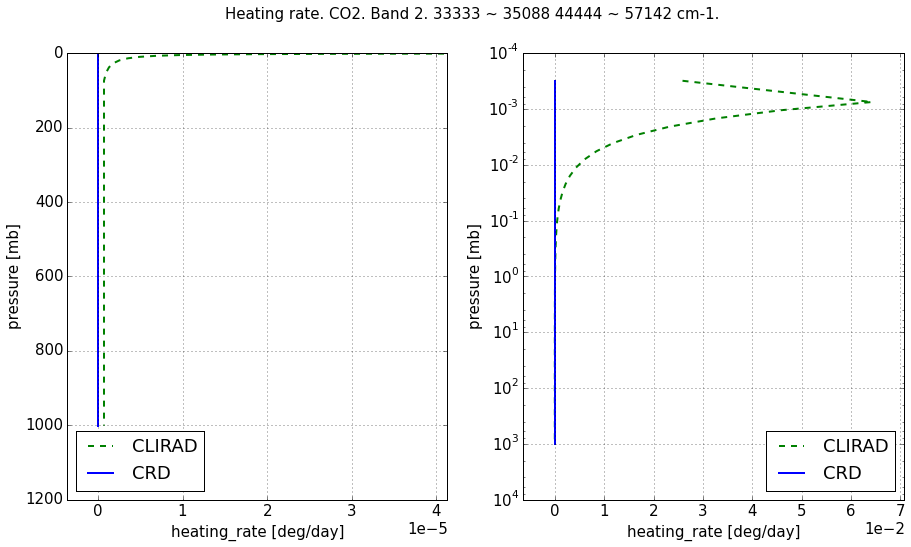


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 3. 30770 ~ 33333 cm-1

CLIRAD
       pressure       flux_up  flux_down  net_flux  heating_rate
70     0.002417 -1.662077e-13   7.937312  7.937312  5.518143e-03
30   299.800000 -7.125401e-14   7.937293  7.937293  1.610760e-07
0   1013.000000 -0.000000e+00   7.937279  7.937279  1.610757e-07

CRD
       pressure  flux_up  flux_down  net_flux  heating_rate
70     0.002417        0   7.937315  7.937315             0
30   299.800000        0   7.937315  7.937315             0
0   1013.000000        0   7.937315  7.937315             0

CLIRAD - CRD
    pressure       flux_up  flux_down  net_flux  heating_rate
70         0 -1.662077e-13  -0.000002 -0.000002  5.518143e-03
30         0 -7.125401e-14  -0.000022 -0.000022  1.610760e-07
0          0 -0.000000e+00  -0.000036 -0.000036  1.610757e-07



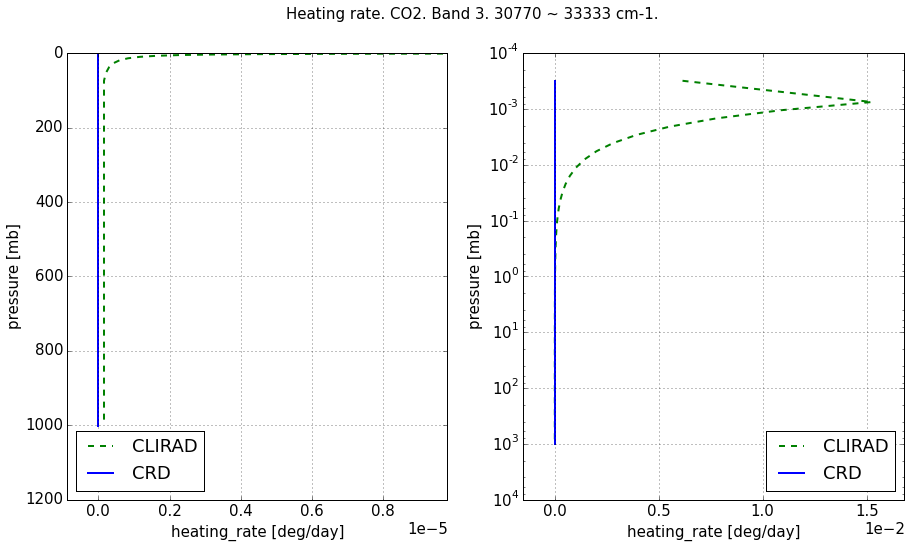


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 4. 25000 ~ 30770 cm-1

CLIRAD
       pressure       flux_up  flux_down   net_flux  heating_rate
70     0.002417 -2.755213e-13  37.994446  37.994446  1.006937e-02
30   299.800000 -1.181866e-13  37.994418  37.994418  2.939280e-07
0   1013.000000 -0.000000e+00  37.994389  37.994389  2.939279e-07

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  37.994446  37.994446             0
30   299.800000        0  37.994446  37.994446             0
0   1013.000000        0  37.994446  37.994446             0

CLIRAD - CRD
    pressure       flux_up  flux_down      net_flux  heating_rate
70         0 -2.755213e-13   0.000000 -2.771117e-13  1.006937e-02
30         0 -1.181866e-13  -0.000028 -2.848616e-05  2.939280e-07
0          0 -0.000000e+00  -0.000057 -5.697231e-05  2.939279e-07



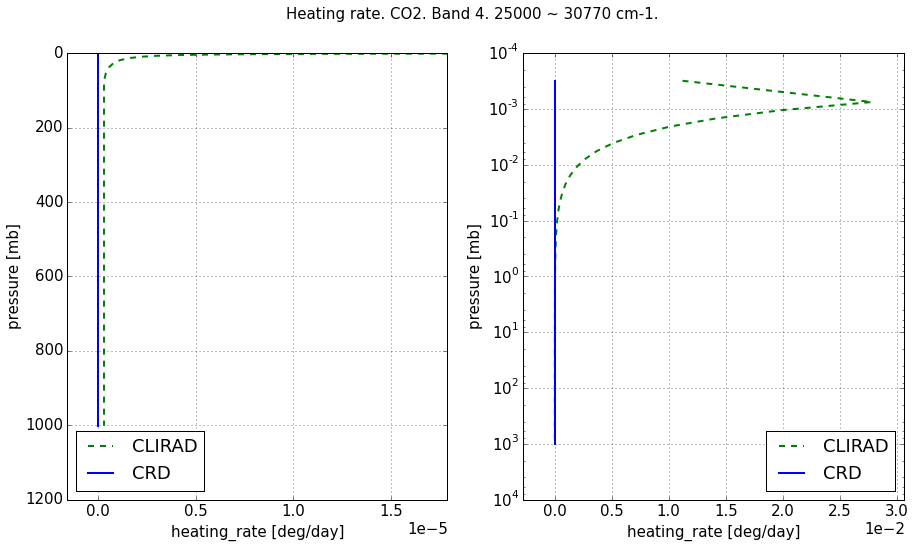


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 5. 14286 ~ 25000 cm-1

CLIRAD
       pressure       flux_up   flux_down    net_flux  heating_rate
70     0.002417 -1.964165e-12  265.032088  265.032088      0.068761
30   299.800000 -8.425245e-13  265.031889  265.031889      0.000002
0   1013.000000 -0.000000e+00  265.031691  265.031691      0.000002

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  265.032088  265.032088             0
30   299.800000        0  265.032088  265.032088             0
0   1013.000000        0  265.032088  265.032088             0

CLIRAD - CRD
    pressure       flux_up  flux_down      net_flux  heating_rate
70         0 -1.964165e-12   0.000000 -1.989520e-12      0.068761
30         0 -8.425245e-13  -0.000198 -1.982608e-04      0.000002
0          0 -0.000000e+00  -0.000397 -3.965216e-04      0.000002



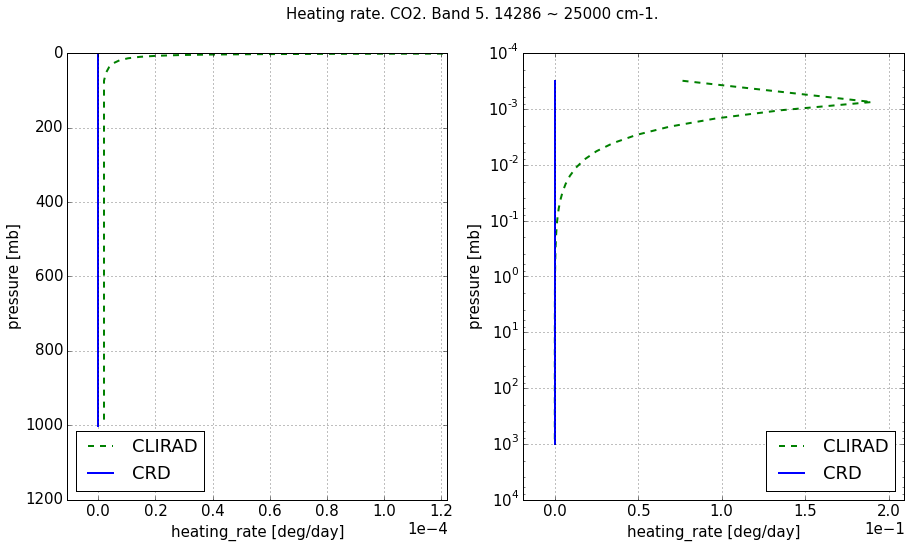


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 6. 8200 ~ 14280 cm-1

CLIRAD
       pressure   flux_up   flux_down    net_flux  heating_rate
70     0.002417 -0.000155  220.865316  220.865161      0.482214
30   299.800000 -0.000066  220.863604  220.863537      0.000014
0   1013.000000 -0.000000  220.862294  220.862294      0.000014

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  220.865517  220.865517      0.000272
30   299.800000        0  220.851940  220.851940      0.000379
0   1013.000000        0  220.820147  220.820147      0.000374

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  heating_rate
70         0 -0.000155  -0.000201 -0.000356      0.481942
30         0 -0.000066   0.011664  0.011598     -0.000365
0          0 -0.000000   0.042147  0.042147     -0.000360



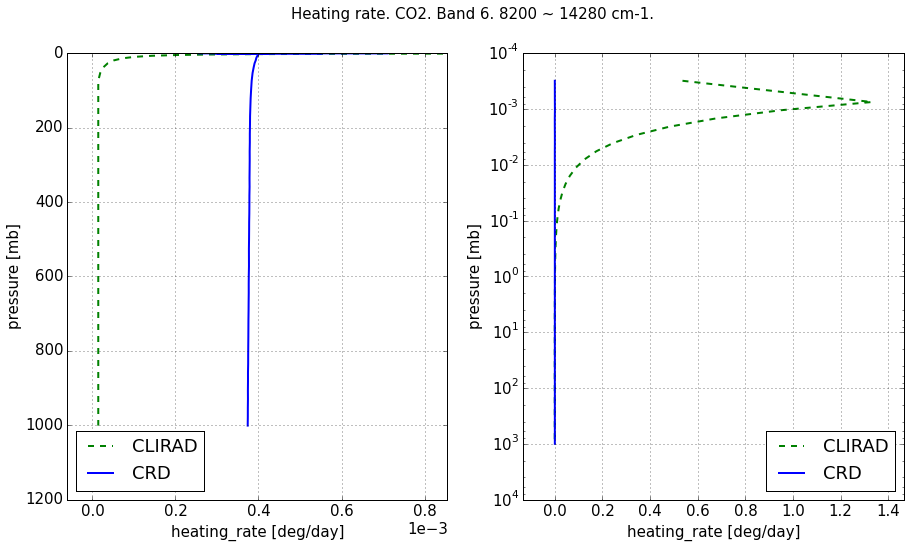


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 7. 4400 ~ 8200 cm-1

CLIRAD
       pressure   flux_up   flux_down    net_flux  heating_rate
70     0.002417 -0.000080  113.874410  113.874331      0.275643
30   299.800000 -0.000034  113.873505  113.873470      0.000008
0   1013.000000 -0.000000  113.872699  113.872699      0.000008

CRD
       pressure  flux_up   flux_down    net_flux  heating_rate
70     0.002417        0  113.874459  113.874459      0.182392
30   299.800000        0  112.641741  112.641741      0.033279
0   1013.000000        0  110.122358  110.122358      0.025892

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  heating_rate
70         0 -0.000080  -0.000049 -0.000129      0.093251
30         0 -0.000034   1.231763  1.231729     -0.033271
0          0 -0.000000   3.750341  3.750341     -0.025884



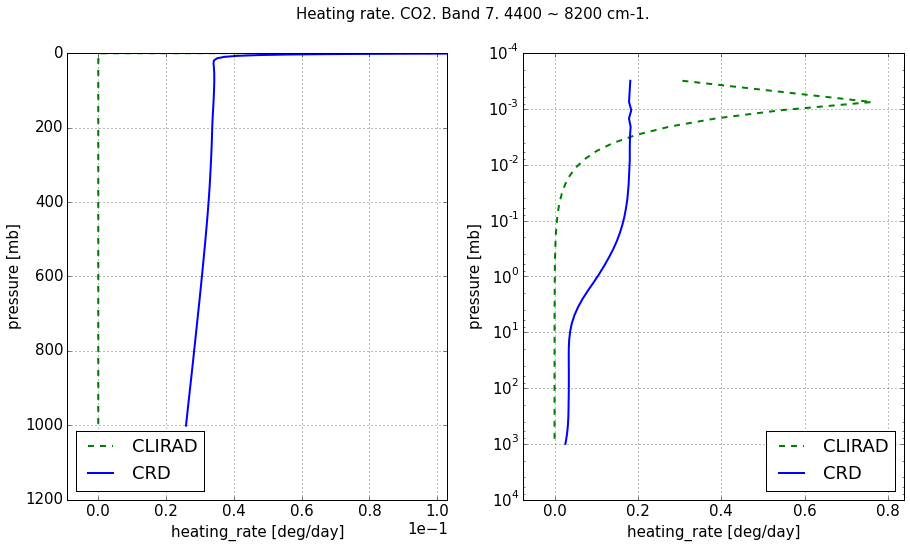


------------------------------------------------------------------------

CLIRAD-SW spectral. Band 8. 1000 ~ 4400 cm-1

CLIRAD
       pressure   flux_up  flux_down   net_flux  heating_rate
70     0.002417 -0.000021  29.352214  29.352193      0.099332
30   299.800000 -0.000009  29.351877  29.351868      0.000003
0   1013.000000 -0.000000  29.351620  29.351620      0.000003

CRD
       pressure  flux_up  flux_down   net_flux  heating_rate
70     0.002417        0  29.349596  29.349596      5.292421
30   299.800000        0  27.000277  27.000277      0.024762
0   1013.000000        0  25.987114  25.987114      0.006617

CLIRAD - CRD
    pressure   flux_up  flux_down  net_flux  heating_rate
70         0 -0.000021   0.002617  0.002597     -5.193089
30         0 -0.000009   2.351600  2.351591     -0.024759
0          0 -0.000000   3.364505  3.364505     -0.006614



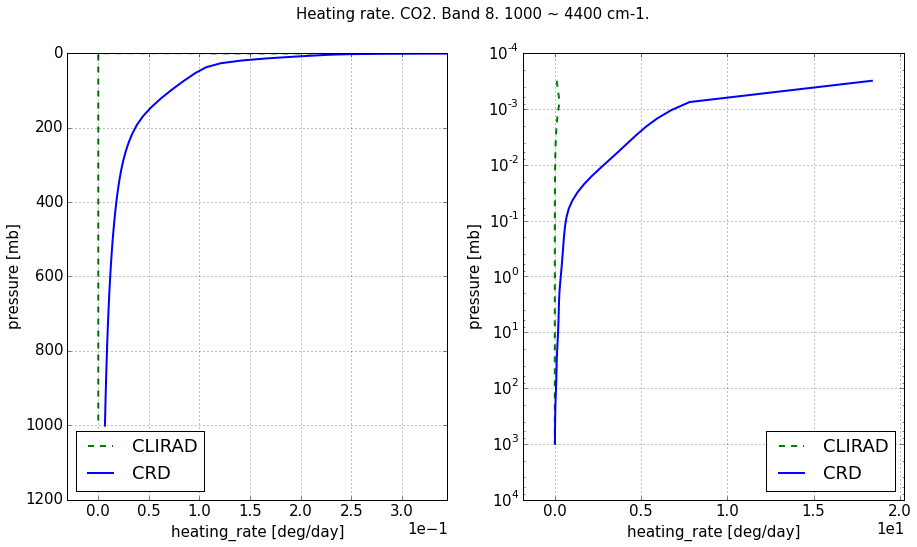


------------------------------------------------------------------------



In [13]:
print('Flux tables and heating rates in CLIRAD spectral bands')
print()
print()

scripts_intermodel.sw_results_by_clirad_bands(
    infos_clirad=[('CLIRAD', 'g', '--', pnl_clirad)],
    infos_lbl=[('CRD', 'b', '-', pnl_crd)],
    name_molecule=name_molecule)

In [14]:
html_download = ('<a href='
                 '"./shortwave_mls_{name_molecule}_by_clirad_bands.xlsx"'
                 'download>'
                 'shortwave_mls_{name_molecule}_by_clirad_bands.xlsx'
                 '</a>')
display.HTML(html_download.format(name_molecule=name_molecule))

In [15]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')